Нужно сократить число цветов в палитре изображения.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, объекты соответствуют пикселям изображения. После выделения кластеров все пиксели, отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import skimage
def draw_picture(image, title, bgr=False):
  b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB ## этот метод ползволяет получить каналы.
  new_image = cv2.merge([r, g, b])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

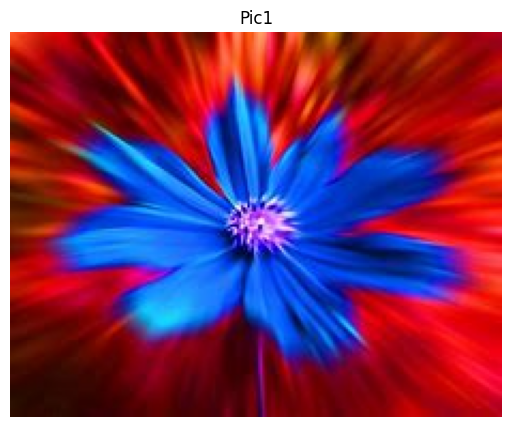

In [2]:
img = cv2.imread('OIP.jpg')
draw_picture(img, 'Pic1', bgr=False)

In [3]:
# метод получает каналы RGB
def get_RGB(image, bgr=False):
  b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
  return [r, g, b]

array([[255, 253, 251, ..., 174, 173, 173],
       [252, 250, 249, ..., 170, 170, 169],
       [249, 250, 251, ..., 164, 164, 163],
       ...,
       [ 46,  46,  45, ..., 184, 184, 182],
       [ 46,  46,  45, ..., 181, 185, 186],
       [ 46,  46,  45, ..., 179, 186, 189]], dtype=uint8)
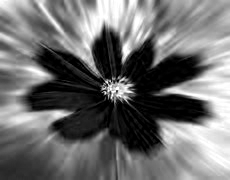

In [4]:
red =get_RGB(img, bgr=False)[0] # Картинка получилась черно белая потому что у нас сейчас это не 3 канала, а один.
# По сути это двумерная матрица. Номер ряда и строки - это номер позиции пикселя. Величина конкретного значения - это величина цвета в палитре RGB.
# Черно-белое изображение у нас потому что мы не подали цвет на вход т.е. у нас есть интенсивность (сила) цвета.
red

array([[89, 85, 78, ...,  0,  0,  0],
       [84, 82, 78, ...,  0,  0,  0],
       [83, 82, 80, ...,  0,  0,  0],
       ...,
       [14, 14, 13, ...,  5,  2,  0],
       [14, 14, 13, ...,  2,  3,  4],
       [14, 14, 13, ...,  0,  4,  7]], dtype=uint8)
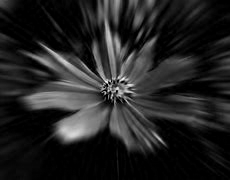

In [5]:
green = get_RGB(img, bgr=False)[1]
green

array([[44, 40, 36, ..., 27, 30, 30],
       [39, 37, 35, ..., 27, 29, 29],
       [35, 35, 36, ..., 25, 27, 29],
       ...,
       [ 1,  1,  0, ..., 26, 25, 25],
       [ 1,  1,  0, ..., 23, 26, 29],
       [ 1,  1,  0, ..., 21, 27, 32]], dtype=uint8)
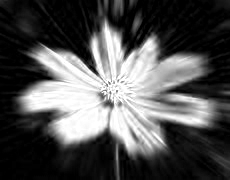

In [6]:
blue = get_RGB(img, bgr=False)[2]
blue

In [7]:
def get_rgb_picture(red, green, blue):
  new_image = cv2.merge([blue, green, red])
  plt.figure(figsize=(7, 5))
  plt.axis('off')
  plt.imshow(new_image)
  plt.show()


def get_jpeg_arr(red, green, blue):
  return cv2.merge([blue, green, red])

In [8]:
def get_jpeg_arr(red, green, blue):
  return cv2.merge([red, green, blue])

array([[[255,  89,  44],
        [253,  85,  40],
        [251,  78,  36],
        ...,
        [174,   0,  27],
        [173,   0,  30],
        [173,   0,  30]],

       [[252,  84,  39],
        [250,  82,  37],
        [249,  78,  35],
        ...,
        [170,   0,  27],
        [170,   0,  29],
        [169,   0,  29]],

       [[249,  83,  35],
        [250,  82,  35],
        [251,  80,  36],
        ...,
        [164,   0,  25],
        [164,   0,  27],
        [163,   0,  29]],

       ...,

       [[ 46,  14,   1],
        [ 46,  14,   1],
        [ 45,  13,   0],
        ...,
        [184,   5,  26],
        [184,   2,  25],
        [182,   0,  25]],

       [[ 46,  14,   1],
        [ 46,  14,   1],
        [ 45,  13,   0],
        ...,
        [181,   2,  23],
        [185,   3,  26],
        [186,   4,  29]],

       [[ 46,  14,   1],
        [ 46,  14,   1],
        [ 45,  13,   0],
        ...,
        [179,   0,  21],
        [186,   4,  27],
        [189,   7,  32]]], dtype=uint8)
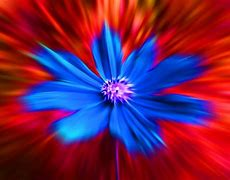

In [9]:
get_jpeg_arr(red, green, blue)

In [10]:
test1 = get_jpeg_arr(red, green, blue)

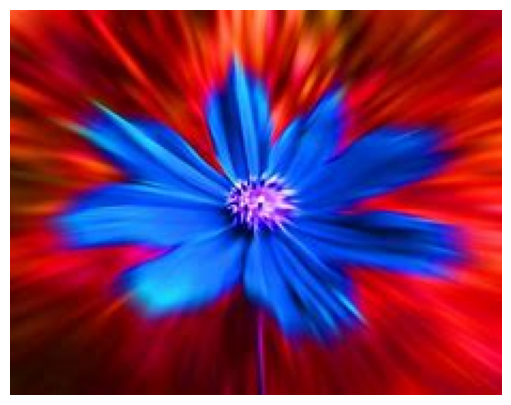

In [11]:
get_rgb_picture(blue, green, red)


In [12]:
img.shape # RGB - трехмерны массив (red, green ,blue). Это три матрицы 180 на 230. В каждой ячейке матрицы находится интенсивность цвета от 0 до 255

(180, 230, 3)

In [13]:
'''
Суть кластеризации.
Кластеризация - это обучение без учителя. Т.е.  целевой переменной сдесь нет.
Поэтому нам надо его найти, чтобы разделить данные на целевые значения.
В моделях же есть наши данные, которые мы подаем на вход и обученные данные (labels_clast, пример)
Обученные данные - это массив сномерами кластеров. т.е. массив с целевыми переменными.
n-мерные графики мы не умеем строить поэтому при построении графиков были взяты пара переменных из массива channels . Целевая переменная - это цвет (c =labels_clast)
'''

'\nСуть кластеризации.\nКластеризация - это обучение без учителя. Т.е.  целевой переменной сдесь нет.\nПоэтому нам надо его найти, чтобы разделить данные на целевые значения.\nВ моделях же есть наши данные, которые мы подаем на вход и обученные данные (labels_clast, пример)\nОбученные данные - это массив сномерами кластеров. т.е. массив с целевыми переменными.\n\nn-мерные графики мы не умеем строить поэтому при построении графиков были взяты пара переменных из массива channels . Целевая переменная - это цвет (c =labels_clast)\n'

In [14]:
# Создадим массив с каналами. Потом
import numpy as np

channels = []
for height in range(img.shape[0]):
  for width in range(img.shape[1]):
    pixel_value = img[height, width]
    channel = [pixel_value[2], pixel_value[1], pixel_value[0]] #добавление каналов RGB соответственно
    channels.append(channel)
channels = np.array(channels)

In [15]:
channels # Мы получили матрицу с цветами [r,g,b]

array([[255,  89,  44],
       [253,  85,  40],
       [251,  78,  36],
       ...,
       [179,   0,  21],
       [186,   4,  27],
       [189,   7,  32]], dtype=uint8)

In [16]:
channels[:,0]

array([255, 253, 251, ..., 179, 186, 189], dtype=uint8)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[9 9 9 ... 0 0 0]


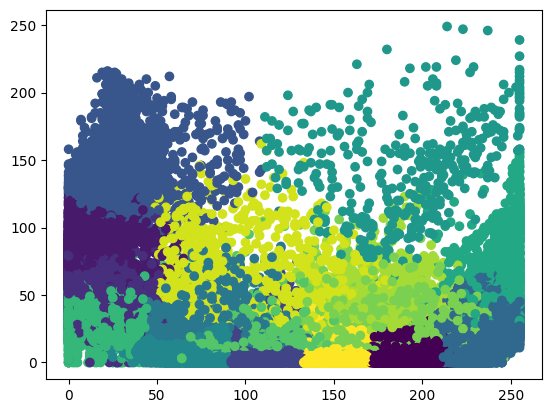

In [17]:
from sklearn.cluster import KMeans
import pandas as pd
kmeans = KMeans(n_clusters= 16 , random_state=0, init ='k-means++')

labels_clast = kmeans.fit_predict(channels)
print(labels_clast)

plt.scatter(channels[:,0],channels[:,1], c =labels_clast)

In [18]:
labels_clast # из матрицы мы получили результирующий цвет который должен быть.

array([9, 9, 9, ..., 0, 0, 0], dtype=int32)

In [19]:
np_labels_clast = np.array(labels_clast) # теперь необходимо вернуть цвет на место каждого пикселя

new_col_pal = np_labels_clast.reshape(img.shape[0], img.shape[1])

In [20]:
new_col_pal.shape

(180, 230)

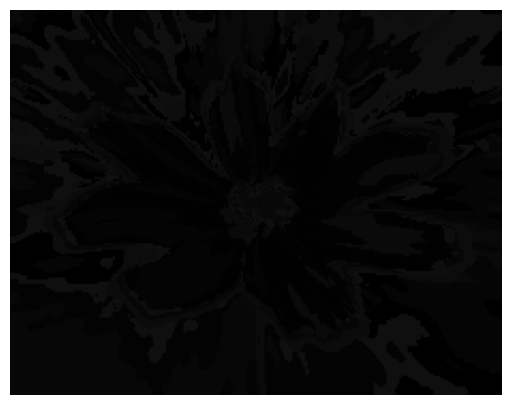

In [21]:
get_rgb_picture(new_col_pal, new_col_pal, new_col_pal)

In [22]:
# Напишем метод, чтобы объединить все вычисления
def KM_get_chan (colour_matrix, clusters_count):
  kmeans = KMeans(n_clusters= clusters_count , random_state=0, init ='k-means++')
  labels_clast = kmeans.fit_predict(colour_matrix)
  np_labels_clast = np.array(labels_clast)
  new_col_pal = np_labels_clast.reshape(img.shape[0], img.shape[1])

  return new_col_pal

2.Реализуйте три модели кластеризации:
a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


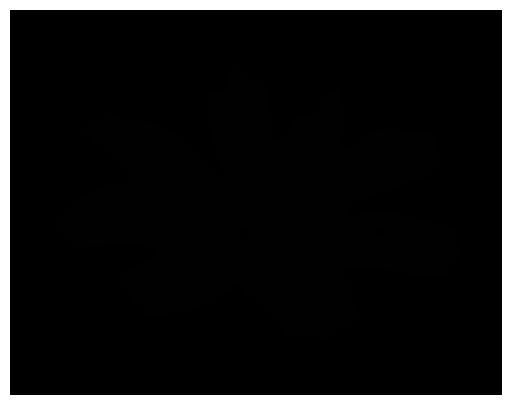

In [23]:
KM_ch_2 = KM_get_chan (channels, 2)
get_rgb_picture(KM_ch_2 , KM_ch_2 , KM_ch_2 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


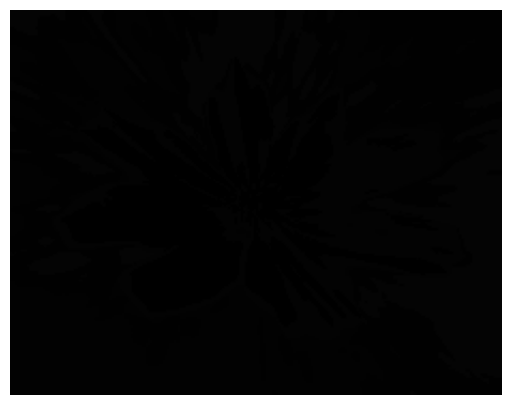

In [24]:
KM_ch_5 = KM_get_chan (channels, 5)
get_rgb_picture(KM_ch_5 , KM_ch_5 , KM_ch_5 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


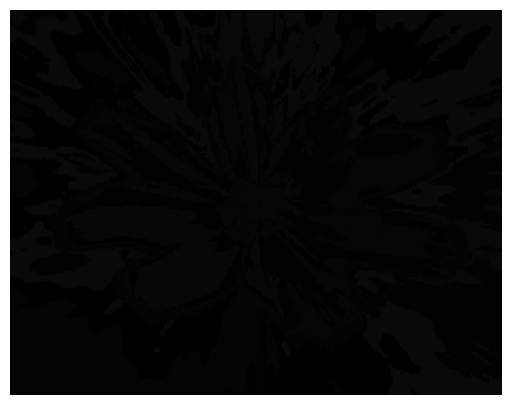

In [25]:
KM_ch_10 = KM_get_chan (channels, 10)
get_rgb_picture(KM_ch_10 , KM_ch_10 , KM_ch_10 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


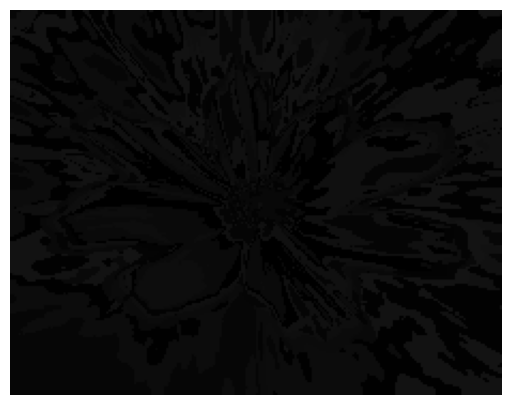

In [39]:
KM_ch_20 = KM_get_chan (channels, 20)
get_rgb_picture(KM_ch_20 , KM_ch_20 , KM_ch_20 )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


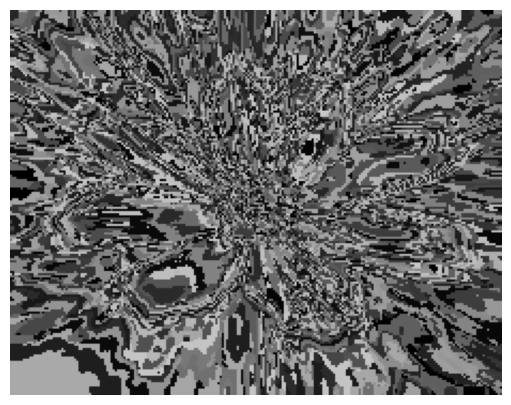

In [41]:
KM_ch_200 = KM_get_chan (channels, 200)
get_rgb_picture(KM_ch_200 , KM_ch_200 , KM_ch_200)

b) DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
# Напишем метод, чтобы объединить все вычисления в один
def DB_get_chan (colour_matrix):
  dbs = DBSCAN(eps =1)
  labels_clast = dbs.fit_predict(colour_matrix)
  np_labels_clast = np.array(labels_clast)
  new_col_pal = np_labels_clast.reshape(img.shape[0], img.shape[1])

  return new_col_pal

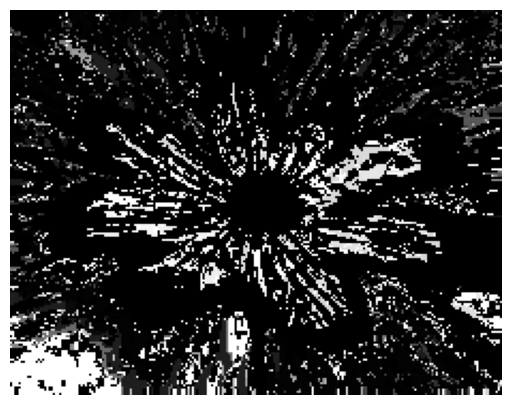

In [28]:
db_chan = DB_get_chan(channels)
get_rgb_picture(db_chan , db_chan , db_chan)

c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.


In [29]:
# Напишем метод, чтобы объединить все вычисления в один
from sklearn.cluster import AgglomerativeClustering


def ACL_get_chan(colour_matrix, clusters_count):
  agcl = AgglomerativeClustering( clusters_count, linkage='single')
  labels_clast = kmeans.fit_predict(colour_matrix)
  np_labels_clast = np.array(labels_clast)
  new_col_pal = np_labels_clast.reshape(img.shape[0], img.shape[1])

  return new_col_pal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


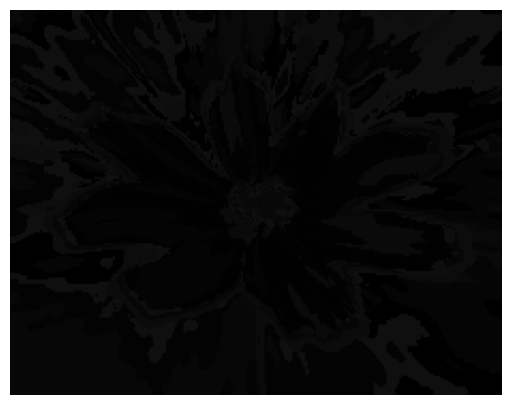

In [30]:
ACL_ch_2 = ACL_get_chan(channels, 2)
get_rgb_picture(ACL_ch_2, ACL_ch_2, ACL_ch_2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


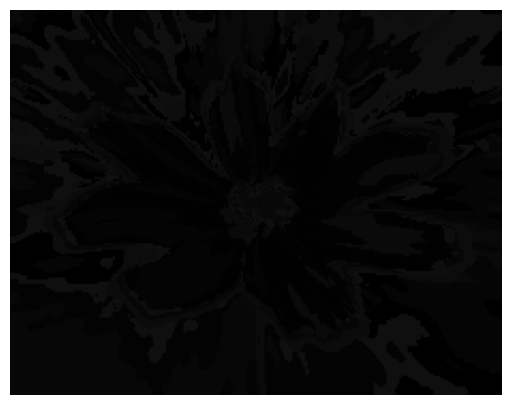

In [31]:
ACL_ch_5 = ACL_get_chan(channels, 5)
get_rgb_picture(ACL_ch_5, ACL_ch_5, ACL_ch_5)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


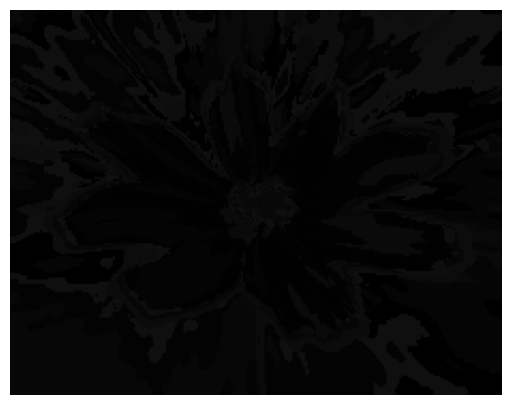

In [32]:
ACL_ch_10 = ACL_get_chan(channels, 10)
get_rgb_picture(ACL_ch_10, ACL_ch_10, ACL_ch_10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


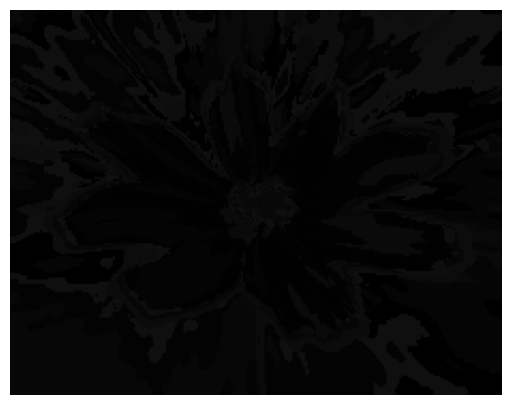

In [33]:
ACL_ch_20 = ACL_get_chan(channels, 20)
get_rgb_picture(ACL_ch_20, ACL_ch_20, ACL_ch_20)

3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.


In [34]:
from skimage.metrics import structural_similarity as ssim

4. Сформулируйте выводы по проделанной работе.
a) Какая модель показала лучший результат?
Для получения зачета по этому домашнему заданию минимально должно быть реализовано обучение трех моделей с одним и тем же значением кластеров, где такой параметр присутствует.

In [43]:
from skimage.metrics import structural_similarity as ssim
import cv2

image1 = cv2.imread("OIP.jpg", cv2.IMREAD_GRAYSCALE)

# Метрика на выходе дает значения от -1 до 1. 1 при идентичном сходстве.
print('SSIM kmeans')

print(f'Cluster count 2: {ssim(image1, KM_ch_2)}')
print(f'Cluster count 5: {ssim(image1, KM_ch_5)}')
print(f'Cluster count 10: {ssim(image1, KM_ch_10)}')
print(f'Cluster count 20: {ssim(image1, KM_ch_20)}')
print(f'Cluster count 200: {ssim(image1, KM_ch_200)}')

print(f'DBscan: {ssim(image1, db_chan)}')


print('Agglomerative_ clastering')

print(f'Cluster count 20: {ssim(image1, ACL_ch_2)}')
print(f'Cluster count 20: {ssim(image1, ACL_ch_5)}')
print(f'Cluster count 20: {ssim(image1, ACL_ch_10)}')
print(f'Cluster count 20: {ssim(image1, ACL_ch_20)}')




SSIM kmeans
Cluster count 2: 0.005209001952366395
Cluster count 5: 0.041080061243399024
Cluster count 10: 0.0777269556850738
Cluster count 20: 0.15542680567101277
Cluster count 200: 0.021436775336932723
DBscan: -0.010064297953388982
Agglomerative_ clastering
Cluster count 20: 0.11759651053894289
Cluster count 20: 0.11759651053894289
Cluster count 20: 0.11759651053894289
Cluster count 20: 0.11759651053894289


In [ ]:
# Наилучший результат по метрике получается у Kmeans с 20 кластерами. dbscan дает наименьшее значение, хотя, визуально, наиболее четкое.
# Алгоритм Иерархичекой кластеризации (AgglomerativeClustering clustering) дал стабильный одинаковый результат.